In [2]:
# some trash code written by Stanley...

import torch
import math
import plotly.graph_objects as go

class Cylinder:
    def __init__(self, params):
        self.center = torch.tensor(params[:3], dtype=torch.float32)
        self.axis = torch.tensor(params[3:6], dtype=torch.float32)
        self.radius = params[6]
        
        # Normalize axis vector (NOTE THAT WE DON'T NEED TO NORMALIZE z!!!)
        # self.z_axis = self.axis / torch.norm(self.axis)
        self.z_axis = self.axis
        
        self.x_axis = torch.tensor([1.0, 0.0, 0.0], dtype=torch.float32)
        # Generate x axis perpendicular to z axis
        if torch.norm(torch.cross(self.z_axis, self.x_axis)) < 1e-6:  # Check if z_axis is not parallel to x_axis
            print("We are in this case!")
            # self.x_axis -= torch.dot(self.z_axis, self.x_axis) * self.z_axis
            self.x_axis = torch.tensor([0.0, 1.0, 0.0], dtype=torch.float32)
        # else:
            # self.x_axis = torch.tensor([1.0, 0.0, 0.0], dtype=torch.float32)
        # self.x_axis /= torch.norm(self.x_axis)
            
        # Generate y axis perpendicular to both z and x axes
        self.y_axis = torch.cross(self.z_axis, self.x_axis)
        self.y_axis = self.y_axis / torch.norm(self.y_axis)
        self.y_axis = self.y_axis * self.radius # make sure that its length is the same as the radius
        
        # Generate x axis perpendicular to both z and y axes
        self.x_axis = torch.cross(self.y_axis, self.z_axis)
        self.x_axis = self.x_axis / torch.norm(self.x_axis)
        self.x_axis = self.x_axis * self.radius
        
    def generate_uv_coordinates(self, num_samples):
        uv_coordinates = [(torch.rand(1).item(), torch.rand(1).item()) for _ in range(num_samples)]
        return uv_coordinates
    
    def generate_point_cloud(self, num_samples):
        uv_coordinates = self.generate_uv_coordinates(num_samples)
        points = []
        for uv in uv_coordinates:
            u, v = uv
            theta = 2 * math.pi * u
            x = math.cos(theta)
            y = math.sin(theta)
            z = v
            point = self.center + x * self.x_axis + y * self.y_axis + z * self.z_axis
            points.append(point)
        return points
    
    def visualize_point_cloud(self, point_cloud):
        
        x_coords = [point[0].item() for point in point_cloud]
        y_coords = [point[1].item() for point in point_cloud]
        z_coords = [point[2].item() for point in point_cloud]
        
        min_x = min(x_coords)
        max_x = max(x_coords)
        min_y = min(y_coords)
        max_y = max(y_coords)
        min_z = min(z_coords)
        max_z = max(z_coords)
        
        # Add a buffer to the min and max coordinates
        buffer_x = 0.2 * (max_x - min_x)
        buffer_y = 0.2 * (max_y - min_y)
        buffer_z = 0.2 * (max_z - min_z)
        
        fig = go.Figure(data=[go.Scatter3d(x=[point[0] for point in point_cloud],
                                            y=[point[1] for point in point_cloud],
                                            z=[point[2] for point in point_cloud],
                                            mode='markers',
                                            marker=dict(size=1))])
        
        # Add unit vectors for x, y, z axes
        fig.add_trace(go.Scatter3d(x=[self.center[0], self.center[0] + self.x_axis[0]],
                                    y=[self.center[1], self.center[1] + self.x_axis[1]],
                                    z=[self.center[2], self.center[2] + self.x_axis[2]],
                                    mode='lines',
                                    line=dict(color='red', width=4),
                                    name='X Axis'))
        
        fig.add_trace(go.Scatter3d(x=[self.center[0], self.center[0] + self.y_axis[0]],
                                    y=[self.center[1], self.center[1] + self.y_axis[1]],
                                    z=[self.center[2], self.center[2] + self.y_axis[2]],
                                    mode='lines',
                                    line=dict(color='green', width=4),
                                    name='Y Axis'))
        
        fig.add_trace(go.Scatter3d(x=[self.center[0], self.center[0] + self.z_axis[0]],
                                    y=[self.center[1], self.center[1] + self.z_axis[1]],
                                    z=[self.center[2], self.center[2] + self.z_axis[2]],
                                    mode='lines',
                                    line=dict(color='blue', width=4),
                                    name='Z Axis'))
        
        fig.update_layout(scene=dict(aspectmode="cube",
                                     xaxis=dict(range=[min(x_coords), max(x_coords)], title='X'),
                                     yaxis=dict(range=[min(y_coords), max(y_coords)], title='Y'),
                                     zaxis=dict(range=[min(z_coords), max(z_coords)], title='Z')),
                          title='Point Cloud Visualization')
        fig.show()
        self.show_data()
        
    def show_data(self):
        print("x_axis: ", self.x_axis, "y_axis: ", self.y_axis, "z_axis: ", self.z_axis)
        print(torch.norm(self.x_axis), torch.norm(self.y_axis), torch.norm(self.z_axis))
        print(torch.dot(cylinder.x_axis, cylinder.y_axis), torch.dot(cylinder.y_axis, cylinder.z_axis), torch.dot(cylinder.z_axis, cylinder.x_axis))


/var/folders/92/zc1_s6n94nz1z_gwqp60znxh0000gn/T/ipykernel_8683/1324322438.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.center = torch.tensor(params[:3], dtype=torch.float32)
/var/folders/92/zc1_s6n94nz1z_gwqp60znxh0000gn/T/ipykernel_8683/1324322438.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.axis = torch.tensor(params[3:6], dtype=torch.float32)
/var/folders/92/zc1_s6n94nz1z_gwqp60znxh0000gn/T/ipykernel_8683/1324322438.py:17: UserWarning: Using torch.cross without specifying the dim arg is deprecated.
Please either pass the dim explicitly or simply use torch.linalg.cross.
The default value of dim will change to agree with that of linalg.cross in a future release.

Iteration 100, Loss: 1.9218294620513916


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

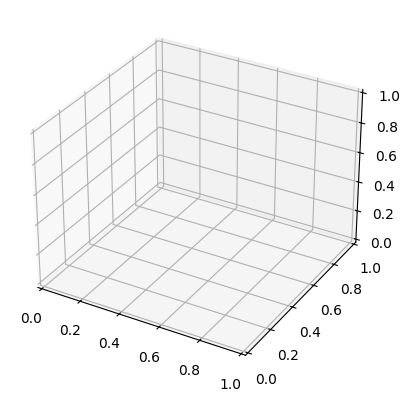

In [4]:
import torch
import matplotlib.pyplot as plt
import math

class CylinderOptimizer:
    def __init__(self, flattened_params, input_point_cloud, learning_rate=1e-4):
        self.input_point_cloud = input_point_cloud
        self.cylinder_params = torch.tensor(flattened_params, requires_grad=True, dtype=torch.float32)
        self.optimizer = torch.optim.SGD([self.cylinder_params], lr=learning_rate)
        self.loss_history = []
        # nn.Parameter() # try this ?
    
    def calculate_distance_loss(self, pred_points, target_points):
        loss = torch.mean(torch.norm(pred_points - target_points, dim=1))
        return loss
    
    def optimize(self, num_iterations=1000):
        for i in range(num_iterations):
            self.optimizer.zero_grad()
            
            # Generate point cloud using current cylinder parameters
            # cylinder = self.create_cylinder_from_params(self.cylinder_params)
            cylinder = Cylinder(self.cylinder_params)
            pred_point_cloud = torch.stack(cylinder.generate_point_cloud(len(self.input_point_cloud)))
            
            # Calculate loss
            loss = self.calculate_distance_loss(pred_point_cloud, self.input_point_cloud)
            self.loss_history.append(loss.item())
            
            # Backpropagation
            loss.backward()
            
            # Update parameters
            self.optimizer.step()
            
            # Print loss every 100 iterations
            if (i + 1) % 100 == 0:
                print(f"Iteration {i+1}, Loss: {loss.item()}")
                # Uncomment below to visualize the cylinder during optimization
                self.visualize_cylinder(pred_point_cloud)

    def get_optimized_cylinder_params(self):
        return self.cylinder_params.detach().numpy()

    def visualize_cylinder(self, pred_point_cloud):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter3D([point[0] for point in pred_point_cloud], [point[1] for point in pred_point_cloud], [point[2] for point in pred_point_cloud])
        # problem of scatter3d: it is not expecting a Tensor with grad???
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('Cylinder Visualization')
        plt.show()

# Example usage
input_point_cloud = torch.randn(1000, 3)  # Example input point cloud
initial_cylinder_params = [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.5]  # Initial cylinder parameters

optimizer = CylinderOptimizer(initial_cylinder_params, input_point_cloud)
optimizer.optimize()

# Get optimized cylinder parameters
optimized_cylinder_params = optimizer.get_optimized_cylinder_params()
print("Optimized Cylinder Parameters:")
print("Center:", optimized_cylinder_params[:3])
print("Axis:", optimized_cylinder_params[3:6])
print("Radius:", optimized_cylinder_params[6])

# Visualize loss history
plt.plot(optimizer.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
plt.show()


In [219]:
# Successful: Example usage
cylinder = Cylinder([0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 0.5])
point_cloud = cylinder.generate_point_cloud(1000)
cylinder.visualize_point_cloud(point_cloud)

cylinder.show_data()
# print(torch.dot(cylinder.x_axis, cylinder.y_axis), torch.dot(cylinder.y_axis, cylinder.z_axis), torch.dot(cylinder.z_axis, cylinder.x_axis))


# Example usage:
# params = [center_x, center_y, center_z, axis_x, axis_y, axis_z, radius]
params = [0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0]
cylinder = Cylinder(params)
point_cloud = cylinder.generate_point_cloud(1000)
cylinder.visualize_point_cloud(point_cloud)

cylinder = Cylinder([1.4, 2.8, 5.7, 9.3, 1.0, 5.0, 2.0])
point_cloud = cylinder.generate_point_cloud(1000)
cylinder.visualize_point_cloud(point_cloud)



x_axis:  tensor([ 0.2887, -0.2887, -0.2887]) y_axis:  tensor([ 0.0000,  0.3536, -0.3536]) z_axis:  tensor([2., 1., 1.])
tensor(0.5000) tensor(0.5000) tensor(2.4495)
tensor(0.) tensor(0.) tensor(0.)
x_axis:  tensor([ 0.2887, -0.2887, -0.2887]) y_axis:  tensor([ 0.0000,  0.3536, -0.3536]) z_axis:  tensor([2., 1., 1.])
tensor(0.5000) tensor(0.5000) tensor(2.4495)
tensor(0.) tensor(0.) tensor(0.)


x_axis:  tensor([ 0.5774, -0.5774, -0.5774]) y_axis:  tensor([ 0.0000,  0.7071, -0.7071]) z_axis:  tensor([2., 1., 1.])
tensor(1.0000) tensor(1.0000) tensor(2.4495)
tensor(0.) tensor(0.) tensor(0.)


x_axis:  tensor([ 0.9615, -0.3439, -1.7196]) y_axis:  tensor([ 0.0000,  1.9612, -0.3922]) z_axis:  tensor([9.3000, 1.0000, 5.0000])
tensor(2.) tensor(2.) tensor(10.6061)
tensor(5.9605e-08) tensor(0.) tensor(-1.0729e-06)
